In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import geopandas as gpd

In [79]:
#!pip install geopandas
# !pip install folium
# !conda install -c conda-forge nodejs
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

# Interactive Visualizations with Widgets

In [80]:
from ipywidgets import interact
import ipywidgets as widgets

In [81]:
def f(x):
    return x**2

In [82]:
interact(f, x = widgets.IntSlider(0))

interactive(children=(IntSlider(value=0, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [10]:
widgets.IntSlider?

Init signature: widgets.IntSlider(*args, **kwargs)
Docstring:     
Slider widget that represents an integer bounded from above and below.
    
Init docstring:
Parameters
----------
value: integer
    The initial value.
min: integer
    The lower limit for the value.
max: integer
    The upper limit for the value.
step: integer
    The step between allowed values.
File:           ~/opt/anaconda3/lib/python3.7/site-packages/ipywidgets/widgets/widget_int.py
Type:           MetaHasTraits
Subclasses:     


In [83]:
df = pd.read_json('https://data.cityofnewyork.us/resource/hy4q-igkk.json')

In [84]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,facility_type,status,due_date,...,x_coordinate_state_plane_,y_coordinate_state_plane_,latitude,longitude,location,:@computed_region_efsh_h5xi,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih
0,22665,2006-08-23T00:00:00.000,2006-08-23T00:00:00.000,DCA,Department of Consumer Affairs,DCA / DOH New License Application Request,Sidewalk Cafe License,N/A,Closed,2006-08-30T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,218,2006-09-18T00:00:00.000,2006-09-18T00:00:00.000,DOT,Department of Transportation,Ferry Inquiry,Lost and Found,N/A,Closed,2006-10-18T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,220,2006-09-18T00:00:00.000,2006-09-26T00:00:00.000,DPR,Department of Parks and Recreation,Maintenance or Facility,Unsecured Facility,N/A,Closed,2006-09-21T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2355,2006-09-18T00:00:00.000,2006-09-18T00:00:00.000,DCA,Department of Consumer Affairs,DCA / DOH New License Application Request,Day Auctioneer License,N/A,Closed,2006-09-25T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8638,2006-08-29T00:00:00.000,2006-09-14T00:00:00.000,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,N/A,Closed,2006-09-14T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df['created_date'] = pd.to_datetime(df['created_date'])

In [86]:
df['month'] = df['created_date'].dt.month

In [87]:
def month_plotter(month):
    ans = df.loc[df['month'] == month]
    adf = ans['complaint_type'].value_counts().nlargest(5)
    return adf.plot(kind = 'bar')

In [88]:
interact(month_plotter, month = widgets.IntSlider(1, min = 1, max = 12))

interactive(children=(IntSlider(value=1, description='month', max=12, min=1), Output()), _dom_classes=('widget…

<function __main__.month_plotter(month)>

### Happiness

In [89]:
happy_ = pd.read_csv('../week_3/data/happiness/2015.csv')

In [90]:
import glob

In [91]:
paths = []
for file in glob.glob('../week_3/data/happiness/*.csv'):
    paths.append(file)

In [92]:
paths

['../week_3/data/happiness/2019.csv',
 '../week_3/data/happiness/2018.csv',
 '../week_3/data/happiness/2015.csv',
 '../week_3/data/happiness/2016.csv',
 '../week_3/data/happiness/2017.csv']

In [93]:
happy_2015 = pd.read_csv(paths[2])
happy_2016 = pd.read_csv(paths[3])
happy_2017 = pd.read_csv(paths[4])
happy_2018 = pd.read_csv(paths[1])
happy_2019 = pd.read_csv(paths[0])

In [94]:
happy_2015['year'] = 2015
happy_2016['year'] = 2016
happy_2017['year'] = 2017
happy_2018['year'] = 2018
happy_2019['year'] = 2019

In [95]:
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [96]:
region_dict = {k:v for k,v in zip(happy_2015['Country'], happy_2015['Region'])}

In [97]:
region_dict = dict(zip(happy_2015['Country'], happy_2015['Region']))

In [98]:
region_dict['Iceland']

'Western Europe'

In [99]:
def region_labeler(country):
    try:
        region = region_dict[country]
        return region
    except:
        return 'unknown'

In [100]:
happy_2017 = pd.read_csv('../week_3/data/happiness/2017.csv')

In [101]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [102]:
happy_2017.to_csv('test_happy_2017.csv')

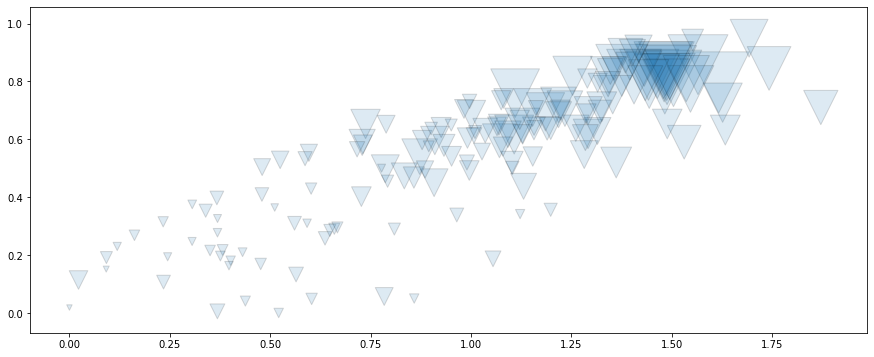

In [103]:
plt.figure(figsize = (15, 6))
plt.scatter(happy_2017['Economy..GDP.per.Capita.'], happy_2017['Health..Life.Expectancy.'], s = np.e**(happy_2017['Happiness.Score'])/0.5,
           alpha = 0.15, edgecolor = 'black', marker = 'v')

In [63]:
happy_2017['Happiness.Score'].describe()

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness.Score, dtype: float64

In [109]:
happy_2017['region'] = happy_2017['Country'].apply(region_labeler)

In [118]:
happy_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [119]:
happy_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [120]:
df_merged = pd.concat([happy_2015, happy_2016], sort = False)

In [121]:
df_merged.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN


In [111]:
df_merged.columns = [i.lower().replace(' ', '_') for i in df_merged.columns]

In [112]:
df_merged = df_merged.iloc[:, :-2]

In [113]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 156
Data columns (total 13 columns):
country                          315 non-null object
region                           315 non-null object
happiness_rank                   315 non-null int64
happiness_score                  315 non-null float64
standard_error                   158 non-null float64
economy_(gdp_per_capita)         315 non-null float64
family                           315 non-null float64
health_(life_expectancy)         315 non-null float64
freedom                          315 non-null float64
trust_(government_corruption)    315 non-null float64
generosity                       315 non-null float64
dystopia_residual                315 non-null float64
year                             315 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 34.5+ KB


In [114]:
from ipywidgets import interact
import ipywidgets as widgets

In [115]:
regs = df_merged.region.value_counts().index

In [116]:
def sel(region):
    frame = df_merged.loc[df_merged['region'] == region]
    plt.scatter(frame['economy_(gdp_per_capita)'], frame['happiness_score'], c = frame['freedom'],
               s = frame['health_(life_expectancy)']*50)
    plt.title('Economy vs. Happiness')
    plt.ylim(0, 10)
    plt.xlabel('Economy (GDP)')
    plt.ylabel('Happiness Score')
    plt.colorbar()

In [117]:
interact(sel, region = widgets.Dropdown(options = regs,
                                       value = 'Western Europe'))

interactive(children=(Dropdown(description='region', index=3, options=('Sub-Saharan Africa', 'Central and East…

<function __main__.sel(region)>

### Happiness through time

### Maps with `folium`

In [122]:
gardens = pd.read_json('https://data.cityofnewyork.us/resource/ajxm-kzmj.json')

In [123]:
gardens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 17 columns):
propid              536 non-null object
boro                536 non-null object
community_board     536 non-null object
council_district    495 non-null float64
garden_name         536 non-null object
address             535 non-null object
size                536 non-null object
jurisdiction        536 non-null object
neighborhoodname    323 non-null object
cross_streets       464 non-null object
latitude            429 non-null float64
longitude           429 non-null float64
postcode            431 non-null object
census_tract        429 non-null float64
bin                 431 non-null object
bbl                 431 non-null object
nta                 431 non-null object
dtypes: float64(4), object(13)
memory usage: 71.3+ KB


In [124]:
start = [gardens.latitude[0], gardens.longitude[0]]
m = folium.Map(location = start, tiles = 'Stamen Toner')

In [125]:
m

In [126]:
folium.Marker(location=start, popup = gardens.garden_name[0]).add_to(m)

In [127]:
m

In [128]:
for row in gardens.dropna().iterrows():
    loc = [row[1]['latitude'], row[1]['longitude']]
    label = row[1]['garden_name']
    folium.CircleMarker(location=loc, radius = 10, fill=True, color = 'crimson',popup = '<strong>Garden Name</strong>: ' + label).add_to(m)

In [129]:
m

In [68]:
gardens.head()

,propid,boro,community_board,council_district,garden_name,address,size,jurisdiction,neighborhoodname,cross_streets,latitude,longitude,postcode,census_tract,bin,bbl,nta,geometry
0,NA,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...,POINT (40.727 -73.979)
1,NA,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...,POINT (40.796 -73.948)
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.08,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...,POINT (40.799 -73.940)
4,NA,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...,POINT (40.729 -73.983)
